<a href="https://colab.research.google.com/github/adrianestebanrodriguez/Repositorio_Datasets/blob/main/Grima2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nombre del proyecto: Mejorando las Finanzas Personales de Grima**
**Proyecto creado por:**  **Adrián Esteban Rodríguez Álvarez**

**E-mail:** adrianalvarezr@gmail.com

**Contexto:**
Grima es una interiorista ubicada en Palmas de Gran Canaria, España. Como profesional independiente presta sus servicios en diseño de interior, diseño de mobiliario y asesoramiento profesional en acabados arquitectónicos y decorativos para empresas y personas que quieren espacios personalizados que reflejen su autenticidad.

Uno de los problemas de Grima es que desconoce si su actividad es rentable. Para resolver este problema, se creó para ella una app que funciona como libro diario, en donde puede registrar sus transacciones y al final de mes realizar una evaluación preliminar.

Se quiere usar la data generada entonces, para realizar análisis de valor que sean de utilidad para Grima con respecto al comportamiento de sus ingresos y egresos.

##**Objetivo general del proyecto**
Entregar recomendaciones a Grima para una optimización de sus ingresos y egresos a partir del comportamiento de los registros realizados en la app.

**Objetivos específicos:**



1.  Analizar el comportamiento de los ingresos y egresos
2.  Identificar particularidades de los ingresos y egresos en función de los meses de registro de la información
3.  Identificar tipos de transacciones de egresos que generan el mayor impacto en las finanzas de Grima
4.  Entregar las respectivas recomendaciones de optimización para Grima, tanto en los ingresos como en los egresos.



#**Preparación del dataframe**

1.   Los registros de ingresos y egresos se obtienen una app cosntruida en Appsheet, la cual permite registrar la información en google drive
2.   La información de google drive se exporta en formato csv y se sube a un repostitorio de Github:
https://github.com/adrianestebanrodriguez/Repositorio_Datasets/raw/refs/heads/main/Copia-de-Data-Set-gastos_1.csv
3.  El Dataset es depurado previamente para evitar erorres en la manipulación de datos (columna fecha se redefine su estructura, se revisa duplicidad de las etiquetas de la columna CUENTA. Los datos de la columna "VALOR" son transformato a float y se le quita su configuración de moneda a número con dos  decimales


#**Preparación para el entorno de exploración y limpieza y de datos**
Se importan las librerias de Pandas, Numpy, Matplotlib, seaborn y statistics


In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

#EXPLORACIÓN INICIAL DEL DATASET
print("EXPLORACIÓN Y LIMPIEZA DE DATASET")

df_gastos = pd.read_csv("https://github.com/adrianestebanrodriguez/Repositorio_Datasets/raw/refs/heads/main/Copia-de-Data-Set-gastos_1.csv")
display(df_gastos)


#NÚMERO DE FILAS Y COLUMNAS DEL DATAFRAME
#El Dataframe tiene 507 filas y 5 columnas
print(f"El dataframe tiene {df_gastos.shape[0]} filas y {df_gastos.shape[1]} columnas")

EXPLORACIÓN Y LIMPIEZA DE DATASET


,FECHA,TRANSACCIÓN,CUENTA,DESCRIPCIÓN,VALOR
0,1/4/2024,Egreso,Suministros,8 Bombillas tubulares con filamento 250 lm 210...,47.08
1,1/2/2024,Egreso,Asesoría Contable,Asesoría fiscal,150.00
2,1/1/2024,Egreso,Teléfono/internet,Teléfono e internet,61.52
3,1/9/2024,Ingreso,Comisiones,Innovamer productos para Bella Ciao,37.65
4,1/2/2024,Egreso,Gastos oficina,prueba dos egrsos,1.10
...,...,...,...,...,...
502,9/5/2025,Ingreso,Factura Proyecto,Parte dos tienda,824.75
503,9/17/2025,Ingreso,Comisiones,Miguel de pavimento Santa Brígida,360.00
504,9/18/2025,Ingreso,Factura Proyecto,Parte final reforma Alejandro plato ducha,487.15
505,9/18/2025,Ingreso,Factura Proyecto,Resto factura Alejandro,487.15


El dataframe tiene 507 filas y 5 columnas


In [ ]:
# @title
#TIPOS DE DATOS QUE TIENE EL DATAFRAME
print(df_gastos.dtypes)
df_gastos.info()

#El Dataframe tiene solo una columna float que es el valor en euros de los ingresos y egresos de Grima. De resto, todos son Objetc
#Por lo tanto, se recomienda realizar un análisis visual relacionando el dato VALOR con los demás datos para poder inferir información
#Igualmente realizar un análisis de el dato "TRANSACCIONES" con el fin de identificar si existe alguna racha o particularidad que sea de interés para el análisis

FECHA           object
TRANSACCIÓN     object
CUENTA          object
DESCRIPCIÓN     object
VALOR          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        507 non-null    object 
 1   TRANSACCIÓN  507 non-null    object 
 2   CUENTA       507 non-null    object 
 3   DESCRIPCIÓN  507 non-null    object 
 4   VALOR        507 non-null    float64
dtypes: float64(1), object(4)
memory usage: 19.9+ KB


In [ ]:
# @title
#LIMPIEZA DE DATOS
#Se corrobora que el dataset no tiene missing values


print("--conteo de valores nulos es")
display(df_gastos.isnull().sum())


--conteo de valores nulos es


,0
FECHA,0
TRANSACCIÓN,0
CUENTA,0
DESCRIPCIÓN,0
VALOR,0


In [ ]:
# @title
#ESTADÍSTICOS
print(df_gastos.describe())


             VALOR
count   507.000000
mean    373.342623
std     687.183021
min       1.100000
25%      38.910000
50%     135.150000
75%     382.120000
max    7217.960000


**Interpretación:**
La media de trasacciones entre ingresos y egresos es de 373.34 euros
El 25% de las transacciones son de 38,91 euros
La media de transacciones hechas está en 135,15 euros
El 75% de las transacciones son de 382,12 euros

In [ ]:
# @title
#CONTEO DE TRANSACCIONES
transaccion= df_gastos['TRANSACCIÓN'].value_counts()
cuenta = df_gastos['CUENTA'].value_counts()
print(transaccion)
print(cuenta)
print(df_gastos['TRANSACCIÓN'].value_counts())


TRANSACCIÓN
Egreso     392
Ingreso    115
Name: count, dtype: int64
CUENTA
Gasolina                             43
Gastos oficina                       43
IGIC                                 42
Comisiones                           41
Venta Suministro                     39
Pago a provedores                    38
Gastos de Grima                      32
Suministros                          27
Factura Proyecto                     25
Impuestos                            19
Seguridad social                     18
Asesoría Contable                    17
Salario                              15
Teléfono/internet                    13
Venta de decorativos                 12
Asesoría empresarial                 10
Trastero                             10
Formacion                            10
Almacenamiento nube                   9
Asesoría contable                     9
Pago Personal                         6
Factura Asesoría                      6
Factura Diseño                        5
Licen

**Interpretación:** Los tres principales registros que tiene mayor frecuencia son gasolina, gastos de oficina, IGIC (impuesto de los autónomos en España).

<Axes: xlabel='TRANSACCIÓN', ylabel='VALOR'>

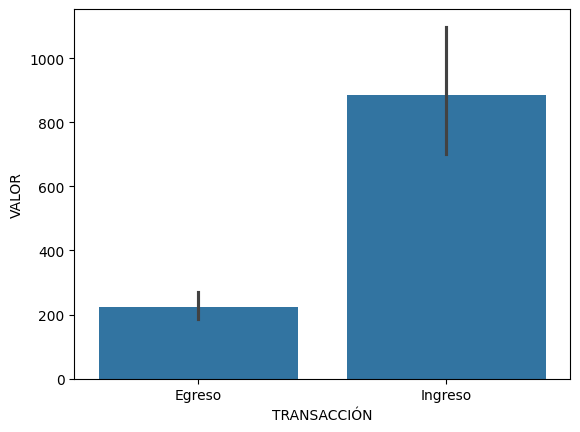

In [ ]:
# @title
#REVISIÓN DE INGRESOS Y EGRESOS
#Se crea un gráfico Barplot para identificar la distribución de ingresos y egresos de Grima
#Se identifica que en todo el periódo de análisis (2024 a 2025) hay mas ingresos que egresos

sns.barplot(x='TRANSACCIÓN' , y='VALOR',data=df_gastos)

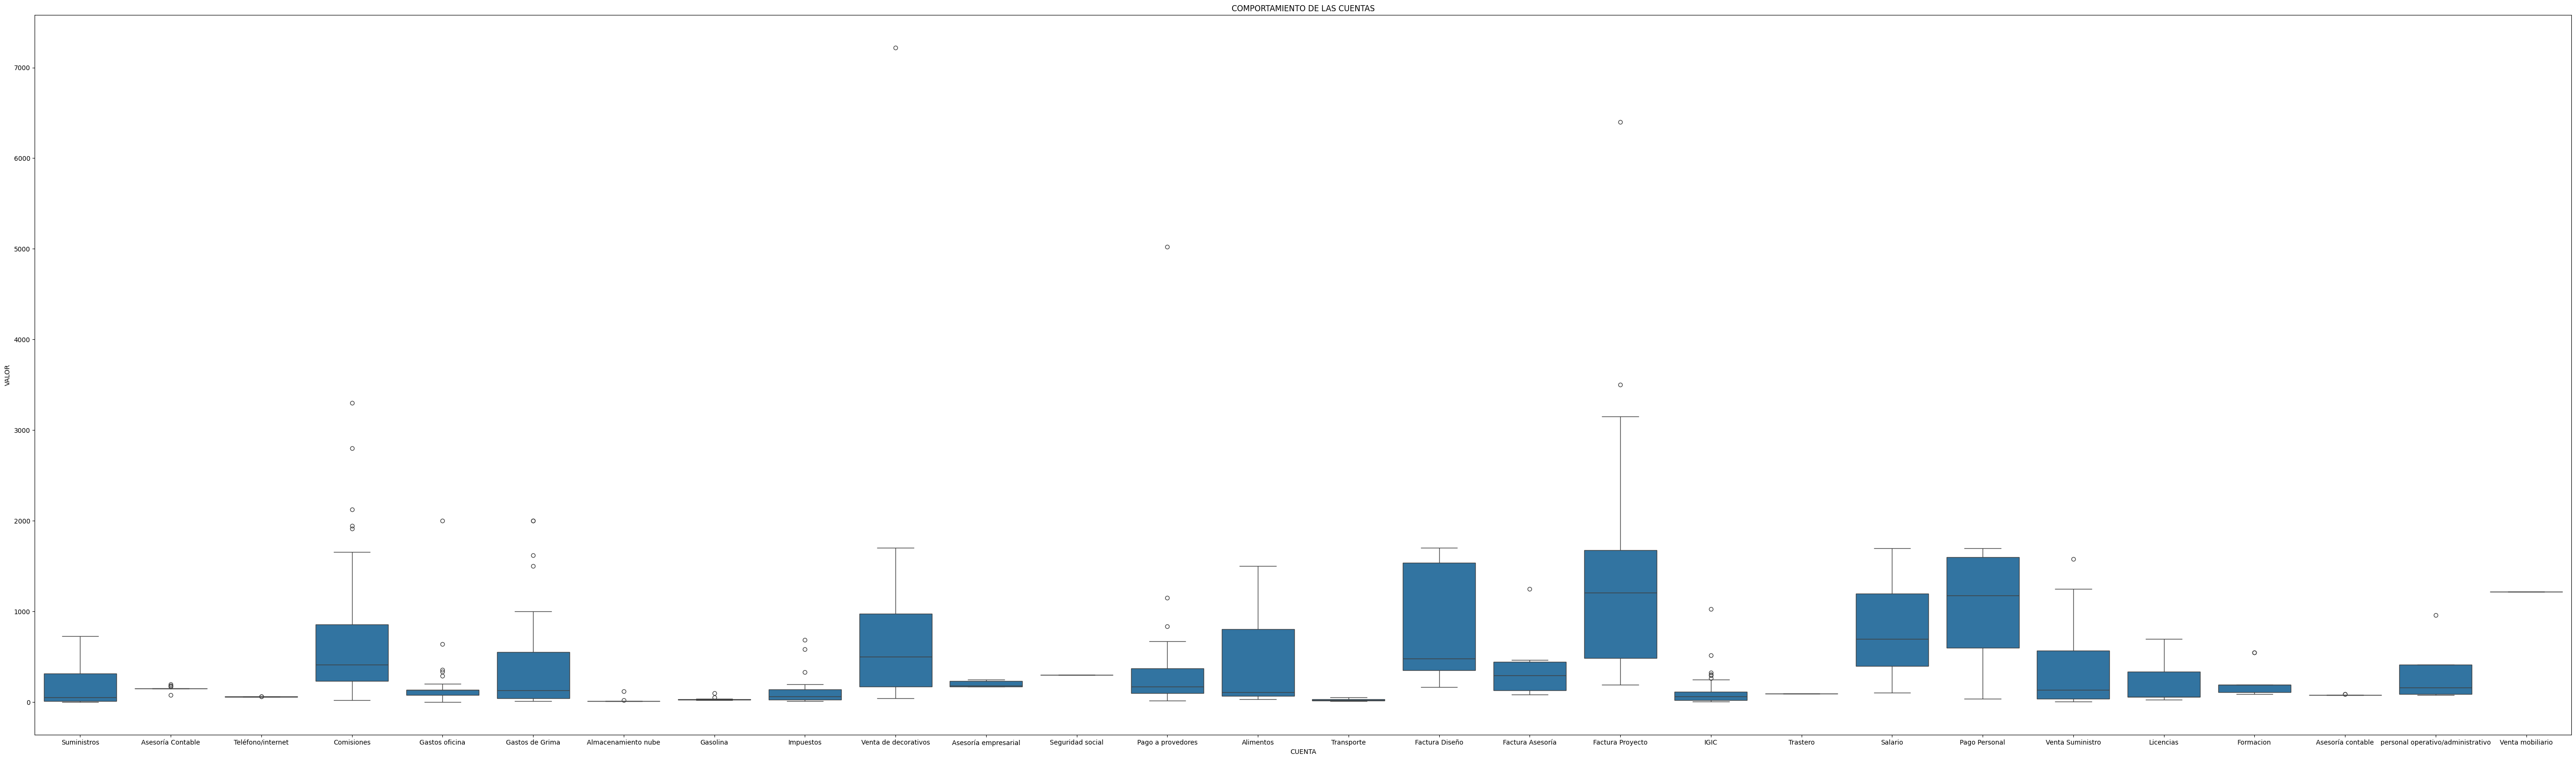

In [ ]:
# @title
#PROFUNDIZACIÓN DE LAS CUENTAS DE  INGRESOS Y EGRESOS
#Se hace un gráfico de cajas para identificar si existen valores desviados en función de lasvariable "CUENTA"

plt.figure(figsize=(70, 20))
sns.boxplot(x='CUENTA', y='VALOR', data=df_gastos)

# Adiciono títulos al gráfico
plt.title("COMPORTAMIENTO DE LAS CUENTAS")
plt.xlabel("CUENTA")
plt.ylabel("VALOR")
plt.show()

**Interpretación:** Se encuentra que la cuenta Gastos de Grima presenta varios valores por encima del número total de valores. Lo que da a entender que una de las posibles fugas de gastos puede estar asociado a esta cuenta, la cual engloba gastos diarios de la emprendedora y gastos de manutención.

La segunda cuenta con mayor variación en los datos es COMISIONES (es una cuenta asociada al recibo de dinero por parte de venta de productos y mobiliario que realiza Grima con terceros). Deduciendo entonces que la emprendedora no tiene control sobre planeación de sus comisiones (por ejemplo, no sabe cuáles son los productos que entregan mejor comisión y asi poder enfocarse en ofrecerlos primero para mejorar su ticket medio).

El tercer rubro de gasto está relacionado con alimentos, el cual muestra que ha sido creciente en el año 2025 (podría estarrelacionado con la inflación en España)

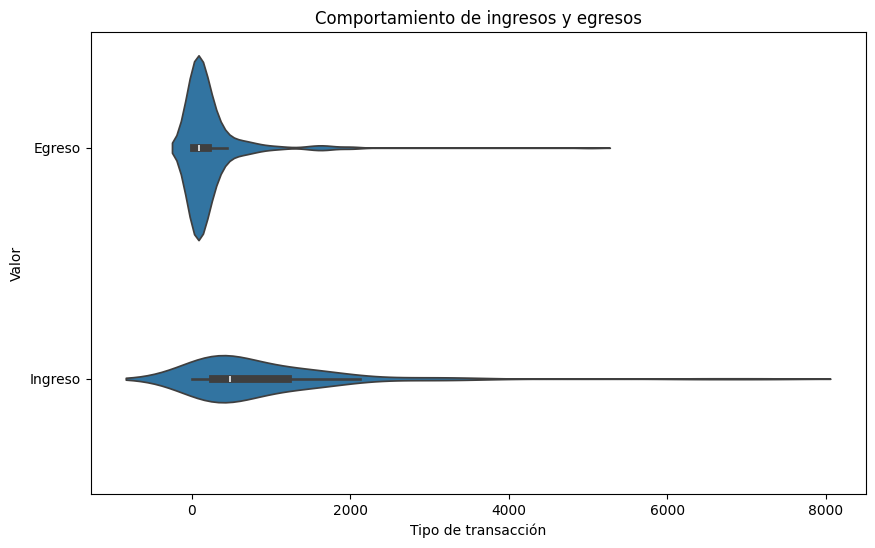

In [ ]:
# @title
#IDENTIFICACIÓN DELVOLUMEN DE INGRESOS Y EGRESOS
#Se hace un gráfico de violín para identificar dónde está concentrada la mayor cantidad de ingresos y egresos


plt.figure(figsize=(10, 6))
sns.violinplot(x='VALOR', y='TRANSACCIÓN', data=df_gastos)

#Adiciono títulos del grafico
plt.title("Comportamiento de ingresos y egresos")
plt.xlabel("Tipo de transacción")
plt.ylabel("Valor")
plt.show()

**Interpretación:** La mayor cantidad de egresos de Grima tienen uun valor entre los 1 euro y 400 euro.
Con respecto a los ingresos la mayor proporción de ingresos recibidos están entre los 500 y los 2000 euros. Encomntrando un factura atípica por más de 7 mil euros. Esto da a entender que la emprendedora no tiene claro a su cliente objetivo y posiblemente esté dejando de percibir más dinero por atender un clientecon ticket medio bajo.

# OTROS ANÁLISIS REALIZADOS
Buscar los meses con mayor número de transacciones de egreso para poder realizar ajustaes en el flujo de caja de Grima




In [ ]:
# @title
#ANALISIS DE LOS EGRESOS CON MAYOR CANTIDAD DE TRANSACCIONES:
#El análisis se concentró en las trasacciones con mayor frecuencia y desglosado por año para identificar variaciones
#Las cuentas a revisar son Gasolina, Gastos de oficina

#GASOLINA
#Se crea Dataframe egresos para poder filtrar el valor de los mismos tanto a global como por años
df_egresos = df_gastos[df_gastos['TRANSACCIÓN'] == 'Egreso'].copy()
df_gasolina =df_gastos[df_gastos['CUENTA'] == 'Gasolina'].copy()

# Convertir FECHA to datetime y extraer año para df_gasolina
df_gasolina['FECHA'] = pd.to_datetime(df_gasolina['FECHA'], format='mixed', dayfirst=True)
df_gasolina['AÑO'] = df_gasolina['FECHA'].dt.year

# Filtrar df_gasolina por año
df_gasolina_2024 = df_gasolina[df_gasolina['AÑO'] == 2024].copy()
df_gasolina_2025 = df_gasolina[df_gasolina['AÑO'] == 2025].copy()


total_gasolina_2024 = df_gasolina_2024['VALOR'].sum()
total_gasolina_2025 = df_gasolina_2025['VALOR'].sum()
total_gasolina_2024_medio = df_gasolina_2024['VALOR'].mean()
total_gasolina_2025_medio = df_gasolina_2025['VALOR'].mean()

print(f"Total gastos en gasolina en 2024: {total_gasolina_2024:.2f}euros")
print(f"Total gastos en gasolina en 2025: {total_gasolina_2025:.2f}euros")
print(f"Media de gastos de gasolina en 2024: {df_gasolina_2024['VALOR'].mean():.2f}euros")
print(f"Media de gastos de gasolina en 2025: {df_gasolina_2025['VALOR'].mean():.2f}euros")

#GASTOS DE  OFICINA
#Se crea Dataframe gastos de oficina
df_gastos_oficina = df_gastos[df_gastos['CUENTA'] == 'Gastos oficina'].copy()


# Convertir FECHA to datetime y extraer año para df_gastos_oficina
df_gastos_oficina['FECHA'] = pd.to_datetime(df_gastos_oficina['FECHA'], format='mixed', dayfirst=True)
df_gastos_oficina['AÑO'] = df_gastos_oficina['FECHA'].dt.year

# Filtrar df_gastos_oficina por año
df_gastos_oficina_2024 = df_gastos_oficina[df_gastos_oficina['AÑO'] == 2024].copy()
df_gastos_oficina_2025 = df_gastos_oficina[df_gastos_oficina['AÑO'] == 2025].copy()

total_oficina_2024 = df_gastos_oficina_2024['VALOR'].sum()
total_oficina_2024_medio = df_gastos_oficina_2024['VALOR'].mean()

total_oficina_2025 = df_gastos_oficina_2025['VALOR'].sum()
total_oficina_2025_medio = df_gastos_oficina_2025['VALOR'].mean()

print(f"Total gastos de oficina en 2024: {total_oficina_2024:.2f}euros")
print(f"Total gastos de oficina en 2025: {total_oficina_2025:.2f}euros")
print(f"Media de gastos de oficina en 2025: {df_gastos_oficina_2024['VALOR'].mean():.2f}euros")
print(f"Media de gastos de oficina en 2025: {df_gastos_oficina_2025['VALOR'].mean():.2f}euros")

Total gastos en gasolina en 2024: 978.30euros
Total gastos en gasolina en 2025: 424.67euros
Media de gastos de gasolina en 2024: 33.73euros
Media de gastos de gasolina en 2025: 30.33euros
Total gastos de oficina en 2024: 4383.50euros
Total gastos de oficina en 2025: 2954.27euros
Media de gastos de oficina en 2025: 182.65euros
Media de gastos de oficina en 2025: 155.49euros


## Identificar meses con altos egresos

### Subtask:
Determinar los meses con mayor número de transacciones por año

**Reasoning**:
Find the maximum number of egresos from the `egresos_por_mes` Series and identify the months that correspond to this maximum value.

In [ ]:
# @title
df_egresos['FECHA'] = pd.to_datetime(df_egresos['FECHA'], format='mixed', dayfirst=True)
df_egresos['MES'] = df_egresos['FECHA'].dt.month
egresos_por_mes = df_egresos.groupby('MES').size()
display(egresos_por_mes)

,0
MES,
1,58
2,27
3,41
4,41
5,45
6,26
7,42
8,23
9,27


/tmp/ipython-input-1977167483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=egresos_por_mes.index, y=egresos_por_mes.values, palette='viridis')


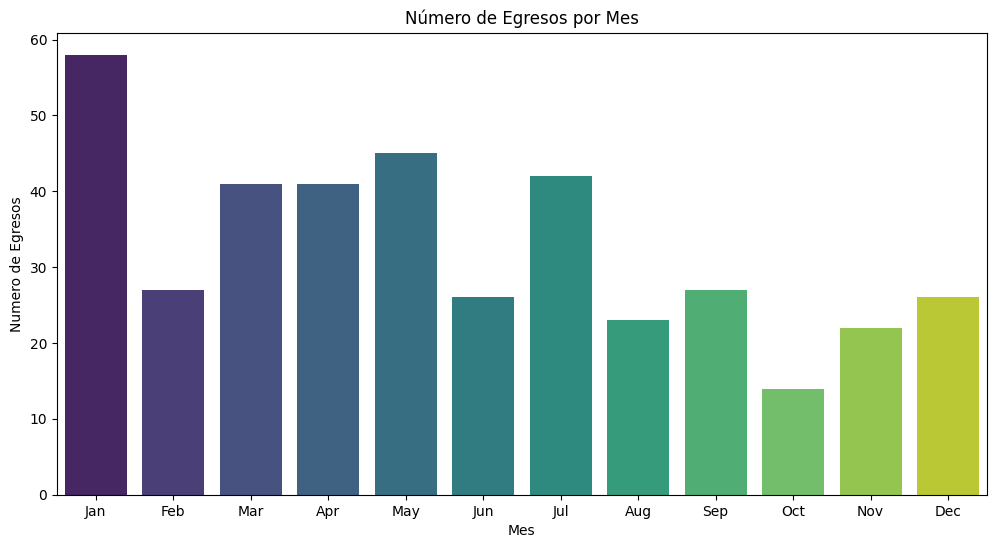

In [ ]:
# @title
plt.figure(figsize=(12, 6))
sns.barplot(x=egresos_por_mes.index, y=egresos_por_mes.values, palette='viridis')
plt.title("Número de Egresos por Mes")
plt.xlabel("Mes")
plt.ylabel("Numero de Egresos")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

,0
FECHA,
1,33
2,16
3,30
4,23
5,20
6,19
7,26
8,7
9,18


,0
FECHA,
1,25
2,11
3,11
4,18
5,25
6,7
7,16
8,16
9,9


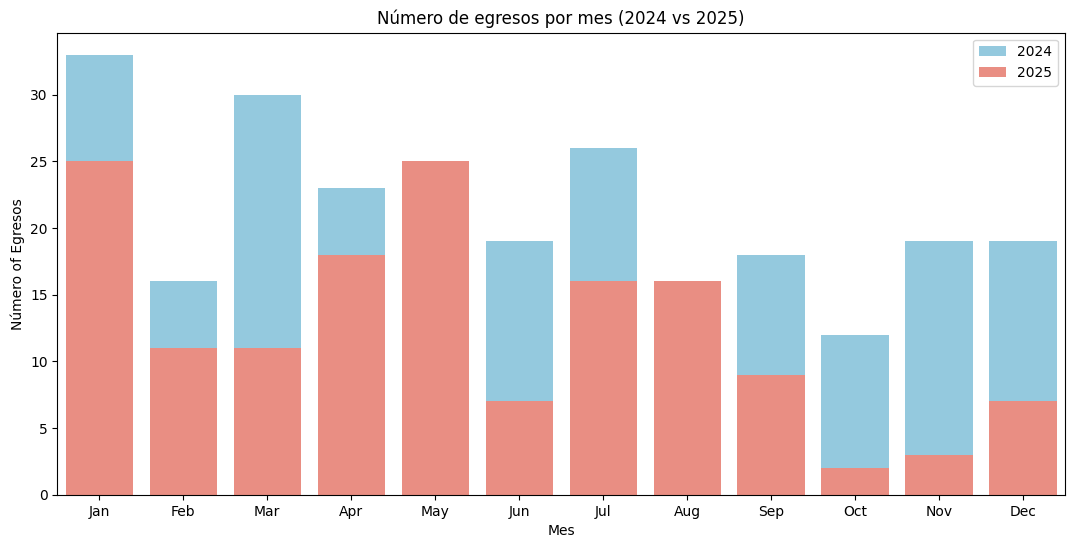

In [ ]:
# @title
df_egresos['FECHA'] = pd.to_datetime(df_egresos['FECHA'], format='mixed', dayfirst=True)
df_egresos_2024 = df_egresos[df_egresos['FECHA'].dt.year == 2024].copy()
df_egresos_2025 = df_egresos[df_egresos['FECHA'].dt.year == 2025].copy()

egresos_por_mes_2024 = df_egresos_2024.groupby(df_egresos_2024['FECHA'].dt.month).size()
egresos_por_mes_2025 = df_egresos_2025.groupby(df_egresos_2025['FECHA'].dt.month).size()

display(egresos_por_mes_2024)
display(egresos_por_mes_2025)
plt.figure(figsize=(13, 6))

sns.barplot(x=egresos_por_mes_2024.index, y=egresos_por_mes_2024.values, color='skyblue', label='2024')
sns.barplot(x=egresos_por_mes_2025.index, y=egresos_por_mes_2025.values, color='salmon', label='2025')

plt.title("Número de egresos por mes (2024 vs 2025)")
plt.xlabel("Mes")
plt.ylabel("Número of Egresos")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

##Interpretación:
En el año 2024 se presentaron mayores egresos en los meses de marzo, octubre, noviembre y diciembre
En el año 2025 los meses de mayor gasto fueron enero, febrero, abril, mayo,julio, agosto
No es posible identificar si hay una estacionalidad de los egresos

## Análisis de los egresos a lo largo del tiempo

### Tarea realizada:
Realizar un gráfico cruzando fecha y valor para identificar si existe algún patrón que  permita determinar si existe algun tiempo del año en donde los gastos puedan tener una subida inesperada


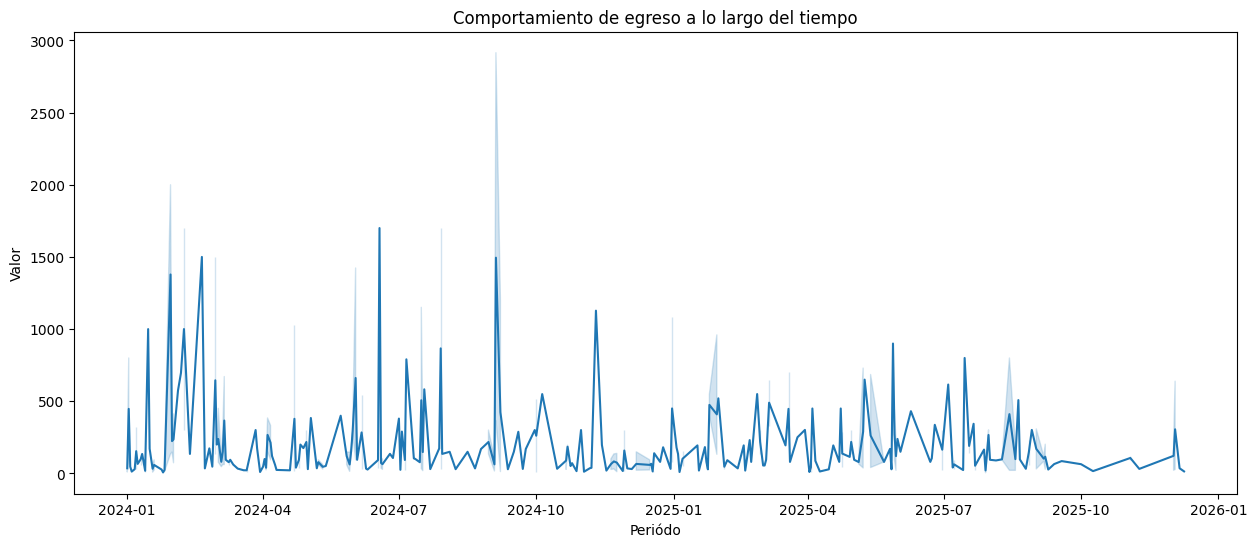

In [ ]:
# @title
plt.figure(figsize=(15, 6))
sns.lineplot(x='FECHA', y='VALOR', data=df_egresos)
plt.title("Comportamiento de egreso a lo largo del tiempo")
plt.xlabel("Periódo")
plt.ylabel("Valor")
plt.show()

#Interpretación:
En el año 2024, se presenta mayor incremento de egresos que en el 2025, por lo que el problema se encuentra en la línea de ingresos que se procederá a analizar a continuación

##Análisis de los ingresos
Se procede a revisar el comportamiento de los ingresos entre los años 2024 y 2025, buscando identificar si hay un incremento o disminución en los mismos de año a año

In [ ]:
# @title
#Se identifica el número de ingresos por año

df_ingresos = df_gastos[df_gastos['TRANSACCIÓN'] == 'Ingreso'].copy()
df_ingresos['FECHA'] = pd.to_datetime(df_ingresos['FECHA'], format='mixed', dayfirst=True)
df_ingresos['MES'] = df_ingresos['FECHA'].dt.month
ingresos_por_mes = df_ingresos.groupby('MES').size()

df_ingresos_2024 = df_ingresos[df_ingresos['FECHA'].dt.year == 2024].copy()
df_ingresos_2025 = df_ingresos[df_ingresos['FECHA'].dt.year == 2025].copy()

ingresos_por_mes_2024 = df_ingresos_2024.groupby(df_ingresos_2024['FECHA'].dt.month).size()
ingresos_por_mes_2025 = df_ingresos_2025.groupby(df_ingresos_2025['FECHA'].dt.month).size()


display(ingresos_por_mes_2024)
display(ingresos_por_mes_2025)

,0
FECHA,
1,5
2,3
3,8
4,3
5,2
6,7
7,14
8,4
9,5


,0
FECHA,
1,3
2,6
3,2
4,2
5,13
6,6
7,4
8,6
9,5


In [ ]:
# @title
#Se identifican el número de transacciones de ingreso por año. Se nota que en el año 2024 hay mayor cantidad de ingresos que en 2025

df_ingresos['AÑO'] = df_ingresos['FECHA'].dt.year
ingresos_por_año = df_ingresos.groupby('AÑO').size().reset_index(name='COUNT')
display(ingresos_por_año)

,AÑO,COUNT
0,2024,65
1,2025,50


## Análisis del ingreso a traves del tiempo

### Tarea realizada:
Se hace un gráfico de líneas para  identificar algún comportamiento de los ingresos entre el año 2024 y año 2025

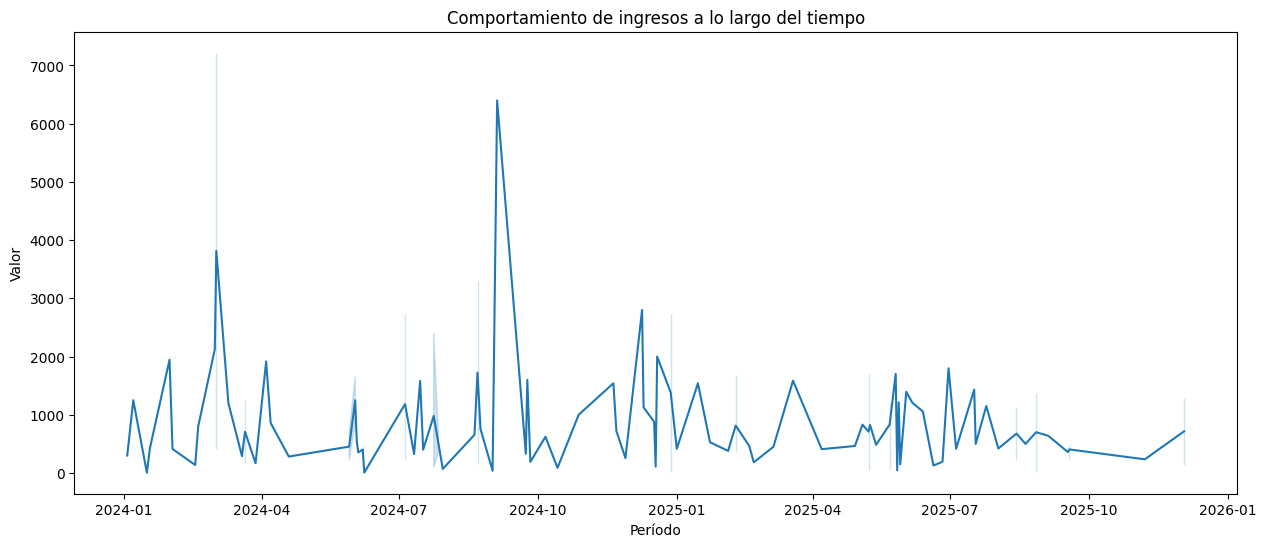

In [ ]:
# @title
plt.figure(figsize=(15, 6))
sns.lineplot(x='FECHA', y='VALOR', data=df_ingresos)
plt.title("Comportamiento de ingresos a lo largo del tiempo")
plt.xlabel("Período")
plt.ylabel("Valor")
plt.show()

##interpretación:
Se identifica una disminución del ticket de ingresos en el año 2025, lo que podría explicar los problemas financieros de Grima. Mientras que en el 2024 Grima tuvo ingresos superiores a los 6 mil euros, en el 2024 el ticket bajo a 1800 euros. Se revisará entonces la media de los ingresos por año para identificar la disminución de los ingresos

Media de ingresos en 2024: 1020.07 euros
Media de ingresos en 2025: 711.33 euros
Mediana de ingresos en 2024: 582.51 euros
Mediana de ingresos en 2025: 485.57 euros


/tmp/ipython-input-2144431448.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=mean_values, palette='viridis')


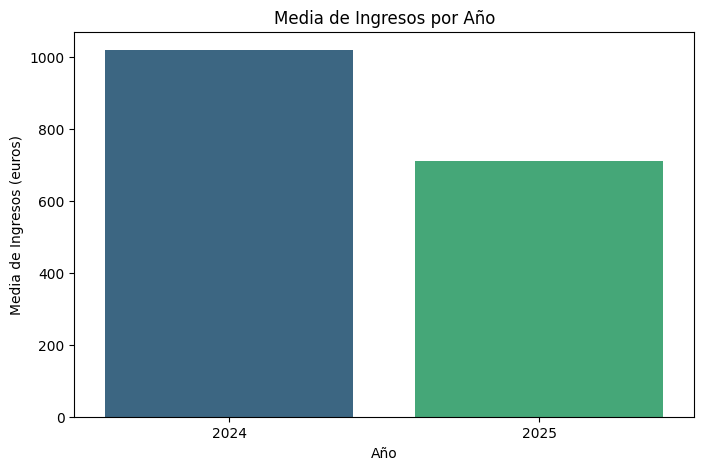

/tmp/ipython-input-2144431448.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=years, y=mean_values, palette='viridis')


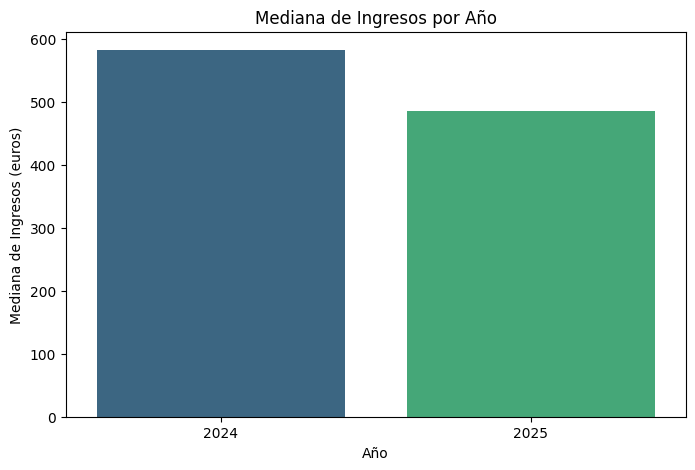

In [ ]:
# @title
# Calculate the mean income for 2024 and 2025
mean_ingresos_2024 = df_ingresos_2024['VALOR'].mean()
mean_ingresos_2025 = df_ingresos_2025['VALOR'].mean()
median_ingresos_2024 = df_ingresos_2024['VALOR'].median()
median_ingresos_2025 = df_ingresos_2025['VALOR'].median()


print(f"Media de ingresos en 2024: {mean_ingresos_2024:.2f} euros")
print(f"Media de ingresos en 2025: {mean_ingresos_2025:.2f} euros")
print(f"Mediana de ingresos en 2024: {median_ingresos_2024:.2f} euros")
print(f"Mediana de ingresos en 2025: {median_ingresos_2025:.2f} euros")

# Crear un bar plot de el valor medio de los ingresos
import matplotlib.pyplot as plt
import seaborn as sns

years = ['2024', '2025']
mean_values = [mean_ingresos_2024, mean_ingresos_2025]

plt.figure(figsize=(8, 5))
sns.barplot(x=years, y=mean_values, palette='viridis')
plt.title("Media de Ingresos por Año")
plt.xlabel("Año")
plt.ylabel("Media de Ingresos (euros)")
plt.show()

# Crear un bar plot de la mediana de los ingresos
import matplotlib.pyplot as plt
import seaborn as sns

years = ['2024', '2025']
mean_values = [median_ingresos_2024, median_ingresos_2025]

plt.figure(figsize=(8, 5))
sns.barplot(x=years, y=mean_values, palette='viridis')
plt.title("Mediana de Ingresos por Año")
plt.xlabel("Año")
plt.ylabel("Mediana de Ingresos (euros)")
plt.show()

# **Conclusión**

Grima ha tenido una pérdida de ingresos promedio de más de 300 euros con respecto a la facturación promedio del año 2024.
Debe entonces concentrase en buscar clientes que le generen un mayor ticket y así mejorar su situación financiera

#Revisión de los valores medios por cuenta
Para terminar, se realiza un análisis comparativo de los valores medios de cada cuenta para identificar rachas o valores con alta tendencia al incremento

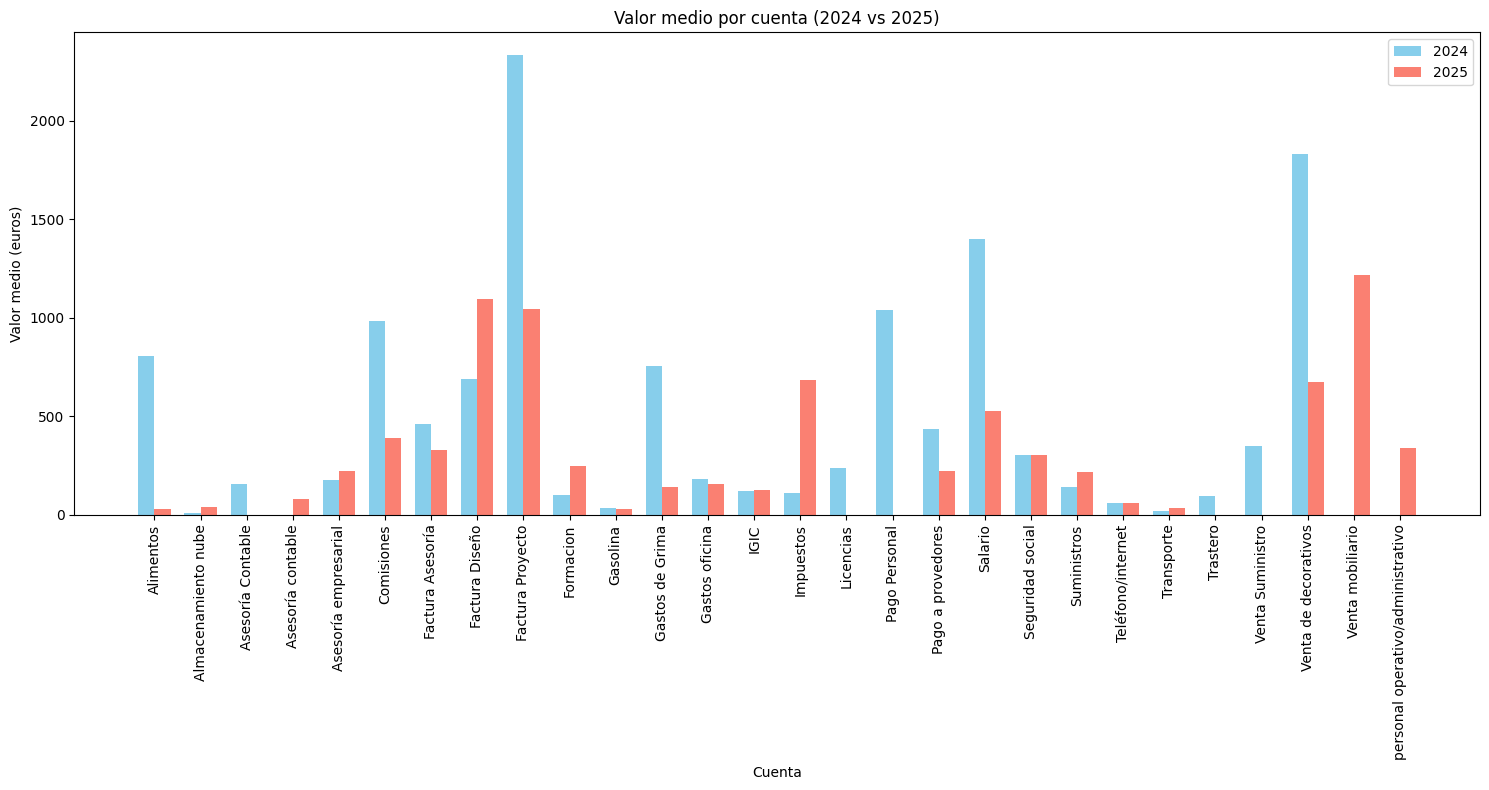

,CUENTA,Mean_Value_2024,Mean_Value_2025
0,Alimentos,804.500000,31.500000
1,Almacenamiento nube,10.790000,40.465000
2,Asesoría Contable,153.853529,0.000000
3,Asesoría contable,0.000000,82.222222
4,Asesoría empresarial,174.020000,219.443333
5,Comisiones,983.830476,388.786000
6,Factura Asesoría,460.940000,328.260000
7,Factura Diseño,686.866667,1093.350000
8,Factura Proyecto,2331.656250,1046.169412
9,Formacion,100.000000,246.138889


In [ ]:
# @title
df_gastos['FECHA'] = pd.to_datetime(df_gastos['FECHA'], format='mixed', dayfirst=True)

# Filtro de datos por cada año
df_2024 = df_gastos[df_gastos['FECHA'].dt.year == 2024].copy()
df_2025 = df_gastos[df_gastos['FECHA'].dt.year == 2025].copy()

# Se calcula el valor medio de los valores de cada cuenta por año
mean_value_per_account_2024 = df_2024.groupby('CUENTA')['VALOR'].mean().reset_index(name='Mean_Value_2024')
mean_value_per_account_2025 = df_2025.groupby('CUENTA')['VALOR'].mean().reset_index(name='Mean_Value_2025')

# Se hace una unión de ambos análisis para poder compararlos
merged_mean_values = pd.merge(mean_value_per_account_2024, mean_value_per_account_2025, on='CUENTA', how='outer').fillna(0)

# Se crea una gráfico de barras agrupado
plt.figure(figsize=(15, 8))
bar_width = 0.35
r1 = np.arange(len(merged_mean_values))
r2 = [x + bar_width for x in r1]

plt.bar(r1, merged_mean_values['Mean_Value_2024'], color='skyblue', width=bar_width, label='2024')
plt.bar(r2, merged_mean_values['Mean_Value_2025'], color='salmon', width=bar_width, label='2025')

plt.xlabel('Cuenta')
plt.ylabel('Valor medio (euros)')
plt.title('Valor medio por cuenta (2024 vs 2025)')
plt.xticks([r + bar_width/2 for r in range(len(merged_mean_values))], merged_mean_values['CUENTA'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

display(merged_mean_values)

#Interpretación:
En las cuentas de egresos se presentan incrementos significativos en las siguientes:


1.   Impuestos: Debe tener una mejor asesoria contable para hacer mejor planteación tributaria y pagar menos

1.  Formación: Debe revisar qué tipo de formación es y qué beneficios le está generando con respecto a la generación de ingresos (se supone que entre mayor educación, mayores son los ingresos)
2.  Personal operativo/administrativo: revisar sus funciones para identificar si es eficiente dicho gasto (si trae cleintes, si mejora procesos internos)

**En la cuenta de salario hay una disminución ostensible, lo que quiere decir que Grima ha tenido que disminuir sus honorarios y tiene relación directa con la disminución de los tickets medios de ingresos**

#Cuentas de ingreso

En las cuentas de ingreso se presentan las siguientes particularidades
Efectivamente se presenta una disminución en el valor de las facturas de los proyectos que suelen ser las que generan mayor ticket.

Se incrementó la cuenta de factura por diseño, pero esta cuenta tiene unos valores medios inferiores que la cuenta de factura de proyecto

En la cuenta de comisiones, se nota una disminución el valor de casi 600 euros por producto vendido de marcas aliadas y proveedores. Debe recuperar esta cuenta para apalancar sus ingresos.

En la cuenta venta de decorativos la disminución de ticket medio ha bajado en más de 1.100 euros, también debe recuperar dicha línea de ingresos para no depender de las facturas de diseño y facturas de proyecto.

La  venta de mobiliario es algo positivo, pues ayudó en la generación de ingresos en el año 2025

# Conclusiones y recomendaciones
Grima presenta una disminución sustancial en sus ingreso, razón por la cual no se ve reflejada una mejoría en su situación en activos y patrimonio (ahorros).

Recomendaciones:

1-Enfocarse en buscar clientes de ticket alto (superior a los 5 mil euros)
2-Volver a retomar la venta de artículos decorativos para recuperar los ingresos perdidos
3-Revisar las comisiones recibidas de tiendas de decoración y materiales. En oposible revisar los productos más rentables que se puedan ofrecer al cliente.

4-**Especial cuidado en los gastos personales.Se recomienda sacar de nuevo un presupuesto personal de gastos para identificar realmente el monto para las necesidades básicas de Grima y volverlo un componente de salario mensual**